## Day1 Optimization 

- Learn python for biological data analysis with chatGPT
- colab의 default working directory에 개인의 google drive 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Introduction of Google Colab

#### Access Google Colab
- Go to [Google Colab](https://colab.research.google.com/) in your web browser.
- Sign in with your Google account.

#### Create a New Notebook
- Click on `File` -> `New Notebook` to create a new notebook.

#### Install Required Libraries
Google Colab comes with many libraries pre-installed, but you might need to install some additional ones, such as `biopython` and `scikit-bio`. You can do this using the `!pip install` command directly in a cell.


In [ ]:
!pip install biopython scikit-bio matplotlib

In [ ]:
!pip install scikit-bio

#### Import Libraries and Verify Installation
In a new code cell, import the libraries to ensure they are installed correctly.


In [1]:
# Importing necessary libraries
import Bio
import skbio

print("Biopython version:", Bio.__version__)
print("scikit-bio version:", skbio.__version__)

Biopython version: 1.84
scikit-bio version: 0.6.2



#### Upload Files to Colab

- Create `2024-kaist-lecture` folder

- ipynb file open with colab

- Download ganbank files from ncbi and upload the files


- current directory

In [2]:
!pwd

/home/haseong/lecture/kaist-deeplearning-2024


- 현재 작업 디렉토리를 위 생성한 디렉토리로 변경

In [ ]:
import os
os.chdir('drive/MyDrive/2024-kaist-lecture')

In [ ]:
!pwd

/content/drive/MyDrive/2024-kaist-lecture


- 분석을 위한 genbank 등의 파일을 ncbi에서 다운로드 후 위 폴더에 복사
- 또는 아래 코드를 이용해서 현재 작업 디렉토리에 업로드

In [ ]:
from google.colab import files

uploaded = files.upload()

# Listing the uploaded files
for filename in uploaded.keys():
    print(filename)

Saving nn.png to nn.png
nn.png


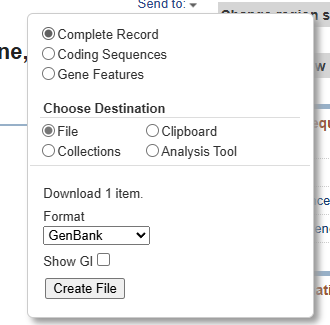

### pytorch

PyTorch is an open-source deep learning framework developed by Facebook's AI Research lab (FAIR). It is widely used in research and industry due to its dynamic computation graph and ease of use.

PyTorch Ecosystem Overview:

torch: The core library for tensor operations and automatic differentiation.  
torch.nn: A sub-library used to build and train neural network models.  
torch.optim: Tools for optimization algorithms (e.g., SGD, Adam).  
torchvision: Provides datasets, pre-trained models, and image transformations.  

### NumPy

NumPy is a powerful library for numerical operations and handling arrays.

#### Basics of NumPy

**Installation:**
```bash
!pip install numpy
```


In [6]:
import numpy as np


# Creating a 1D array
arr1 = np.array([1, 2, 3, 4, 5])

# Creating a 2D array
arr2 = np.array([[1, 2, 3], [4, 5, 6]])

print(arr1)
print(arr2)


# Element-wise operations
arr3 = arr1 * 2
print(arr3)

# Mathematical functions
print(np.sqrt(arr1))


[1 2 3 4 5]
[[1 2 3]
 [4 5 6]]
[ 2  4  6  8 10]
[1.         1.41421356 1.73205081 2.         2.23606798]


#### Numpy datatype ndarray

* 행렬이나 다차원 배열 처리용 파이썬 라이브러리
* 같은 타입의 데이터만 허용
* 리스트에 비해 20배 이상 빠른 속도

In [8]:
import numpy as np

display(np.ones(4))
display(np.ones((3, 4)))
display(np.ones((2, 3, 4)))


array([1., 1., 1., 1.])

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

![alt text](images/ndim.png)

- Create numpy objects

In [9]:
import numpy as np

arr = [1, 2, 3]
print(arr)
print(type(arr))

a = np.array([1,2,3])
print(a)
print(a.dtype)
print(a.shape)
print(type(a))

[1, 2, 3]
<class 'list'>
[1 2 3]
int64
(3,)
<class 'numpy.ndarray'>


In [ ]:
arr2 = np.array([[1,2,3], [4,5,6]])
print(arr2)
print(type(arr2))
print(arr2.shape)
print(arr2.dtype)

[[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>
(2, 3)
int64


* numpy 자료형
    * 부호가 있는 정수 int(8, 16, 32, 64)
    * 부호가 없는 정수 uint(8 ,16, 32, 54)
    * 실수 float(16, 32, 64, 128)
    * 복소수 complex(64, 128, 256)
    * 불리언 bool
    * 문자열 string_
    * 파이썬 오프젝트 object
    * 유니코드 unicode_

* np.zeros(), np.ones(), np.arange()
* 행렬 연산 지원

In [ ]:
a = np.arange(1, 10).reshape(3,3) # [1, 10)
print(a)
a = np.ones((3,4), dtype=np.int16)
b = np.ones((3,4), dtype=np.int16)
print(a)
print(b)
print(a+b)
print(a-b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


* numpy 함수
    * np.sqrt()
    * np.log()
    * np.square()
    * np.log()
    * np.ceil()
    * np.floor()
    * np.isnan()
    * np.sum()
    * np.mean()
    * np.std()
    * np.min()

### Linear regression

#### Simple linear regression

- Model  
$$
y_i = b_0 + b_1 x_i  + \epsilon_i \text{ where } \epsilon_i \sim \text{ iid } N(0, \sigma^2)
$$

- parameters

$$
\theta = \{ b_0, b_1 \}
$$

- Find $\theta$ that minimize residuals

$$
\sum_{i=i}^n r_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2  \\
\sum_{i=1}^n (y_i - \hat{b_1}x_i - \hat{b_0})^2
$$


- residuals: difference between sample observed and estimated values

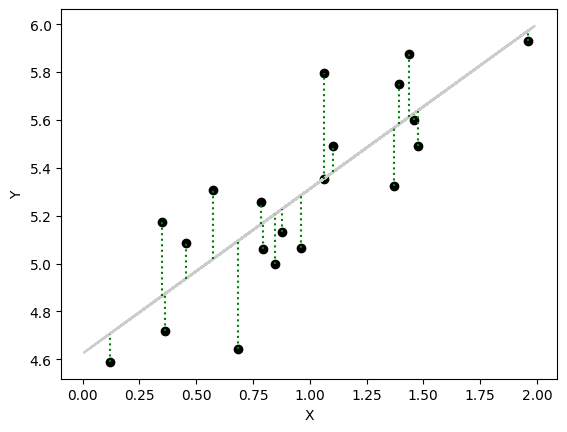

In [4]:
import numpy as np

np.random.seed(123)
X = 2 * np.random.rand(20, 1)
Y = 4 + X*0.8 + np.random.rand(20, 1)

X_b = np.c_[np.ones(len(X)), X]
# print(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ (X_b.T) @ Y
Y_pred_org = X_b @ theta_best
# print(theta_best)

X_new = 2 * np.random.rand(100, 1)
X_new_b = np.c_[np.ones(len(X_new)), X_new]
Y_pred = X_new_b @ theta_best

import matplotlib.pyplot as plt
plt.scatter(X, Y, color="#000000")
plt.plot(X_new, Y_pred, color='#cccccc', label='Predictions')

# Plot residuals
for i in range(len(Y)):
    plt.vlines(x=X[i], ymin=min(Y[i], Y_pred_org[i]), ymax=max(Y[i], Y_pred_org[i]), color='green', linestyle='dotted')


plt.xlabel('X')
plt.ylabel('Y')
plt.plot()
plt.show()


### Ordinary least sequare (OLS)


- Model  

$$
y_i = b_0 + b_1 x_i  + \epsilon_i \text{ where } \epsilon_i \sim \text{ iid } N(0, \sigma^2), i = 1, 2, ..., n
$$

$$
\begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_n \\
\end{pmatrix} 
=
\begin{pmatrix}
1 \ \ x_1 \\
1 \ \ x_2 \\
... \\
1 \ \ x_n \\
\end{pmatrix}

\begin{pmatrix}
b_0 \\
b_1 \\
\end{pmatrix}

+


\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
... \\
\epsilon_n \\
\end{pmatrix}
$$

$$
Y = X \beta + \epsilon
$$



$$
\mathbf{\epsilon} = Y - X\beta 
$$

- Residual Sum of Squares (RSS)

$$
RSS = (Y-X\beta)^T(Y-X\beta)
$$

- Take the gradient with respect to $\beta$ and set it to zero (Normal equation)

$$
\frac{\partial RSS}{\partial \beta} = -2 X^T Y + 2 X^T X \beta = 0
$$

- Solve for $\beta$ if $(X^TX)^{-1}$ exists

$$
(X^T X) \beta = X^T Y
$$

$$
\hat{\beta} = (X^T X)^{-1} X^T Y
$$




### Maximum Likelihood Estimation (MLE)

- Details: https://statproofbook.github.io/P/slr-mle.html
- Consider the regression as a joint probability model

- **Reasons to use**
    - This framework is applicable to other complex models (non-linear, neural network)

- Bayes rule where $D$ is data, $\theta$ is parameter

$$
p(\theta | D) = \frac{p(D|\theta) p(\theta)}{p(D)}
$$

$$
\text{where $p(\theta|D)$, $p(D|\theta)$, $p(\theta)$ are posterior, likelihood and prior, respectively}
$$

$$
p(\theta | D) \propto p(D|\theta) 
$$

- Regarding the likelihood, $p(Y|X, \theta)$ is interpreted as how the behaviour of the response $Y$ is conditional on the values of the feature, $X$, and parameters, $\theta$ 

$$
\begin{align}
p(Y | X, \theta)  = \prod_{i=1}^n p( y_i | x_i, \hat{\theta})
\end{align}
$$

- Then, we can ask what is the probability of seeing the data, given a specific set of parameters? (== How the data likely to be observed given the parameters == which parameters maximize the likelihood)

$$
\hat{\theta} = \text{argmax}_\theta \text{ log } \sum_{i=1}^n p( y_i | x_i, \theta)
$$

- For $p(y_i | x_i, \theta)$, we have assumption that all feature vectors are iid

$$
Y \sim N(X\beta, \sigma)
$$


$$
\begin{align}
p( y_i | x_i, \theta) &= N(y_i; X\beta, \sigma^2) \\
&= \frac{1}{\sqrt{2\pi \sigma^2}} \exp{\left( - \frac{(y_i - b_0 - b_1 x_i)^2}{2 \sigma^2} \right)}
\end{align}
$$



- Log likelihood (LL) function

$$
\begin{align}
LL(\theta) &= \text{ log } \left( \prod_{i=1}^n p( y_i | x_i, \theta) \right) \\
&= \text{ log } \left( \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}} \exp{ \left(- \frac{(y_i - b_0 - b_1 x_i)^2}{2 \sigma^2} \right)} \right) \\
&= \text{ log } \left( \frac{1}{\sqrt{(2\pi\sigma^2)^n}} \exp{ \left( - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - b_0 - b_1 x_i)^2 \right)} \right) \\
&= - \frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - b_0 - b_1 x_i)^2
\end{align}
$$


- Take the gradient with respect to $\beta$ and set it to zero (OLS)

$$
\frac{\partial LL(b_0, b_1, \sigma^2)}{\partial b_0} = \frac{1}{\sigma^2} \sum_{i=1}^n (y_i - b_0 - b_1 x_i)
$$

$$
\begin{align}
\frac{\partial LL(\hat{b}_0, \hat{b}_1, \sigma^2)}{\partial b_0}  = 0 \\
\sum_{i=1}^n (y_i - \hat{b}_0 - \hat{b}_1 x_i) = 0 \\
\hat{b}_0 = \frac{1}{n}\sum_{i=1}^n y_i - \hat{b}_1 \frac{1}{n} \sum_{i=1}^n x_i \\
\end{align}
$$



$$
\frac{\partial LL(\hat{b}_0, b_1, \sigma^2)}{\partial b_1} = \frac{1}{\sigma^2} \sum_{i=1}^n (x_i y_i - \hat{b}_0 x_i - b_1 x_i^2)
$$

$$
\begin{align}
\frac{\partial LL(\hat{b}_0, \hat{b}_1, \sigma^2)}{\partial b_1}  = 0 \\
\hat{b}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2 }
\end{align}
$$

- Maximize with respect to $\sigma^2$

$$
\frac{\partial LL(\hat{b}_0, \hat{b}_1, \sigma^2)}{\partial \sigma^2} = - \frac{n}{2 \sigma^2} + \frac{1}{2 (\sigma^2)^2} \sum_{i=1}^n (y_i - \hat{b}_0 - \hat{b}_1 x_i)^2
$$

$$
\frac{\partial LL(\hat{b}_0, \hat{b}_1, \hat{\sigma}^2)}{\partial \sigma^2} = 0 \\
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{b}_0 - \hat{b}_1 x_i)^2
$$

- In linear regression, MLE naturally leads to the OLS solution under the assumption of normally distributed residuals. 

$$
\hat{\beta} = (X^T X)^{-1} X^T Y
$$

$$
\hat{\sigma}^2 = \frac{1}{n} (Y-X\beta)^T (Y-X\beta)
$$


- However, MLE’s flexibility (e.g. customizable likelihood) extends beyond linear models, making it indispensable for logistic regression, mixture models, and modern deep learning frameworks.

### Gradient Decent 

- An iterative optimization algorithm for adjusting $\beta$ by minimizing a cost function. In linear regression, the cost function is the Mean Squared Error (MSE) under the assumption of normally distributed residuals.

- Define a cost function $J(\theta)$

$$
LL(\theta) = - \frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - b_0 - b_1 x_i)^2 
$$

$$
J(\beta) =  \sum_{i=1}^n (y_i - b_0 - b_1 x_i)^2 
$$

- matrix notation

$$
J(\beta) = || Y - X\beta ||^2 = (Y - X\beta)^T(Y - X\beta)
$$

- L1 norm, L2 norm (a metric for length or magnitude of a vector/matrix)
$$
||X||_1 = \sum_{i}^n |x_i|
$$

$$
||X||_2 = \sqrt{\sum_i^n x_i^2}
$$

$$
J(\beta) = Y^T Y - 2 Y^T X \beta + \beta^T X^T X \beta
$$

- Gradient of the cost function

$$
\nabla_\beta J(\beta) = \frac{\partial J(\beta)}{\partial \beta}
$$

$$
\begin{align}
\nabla_\beta J(\beta) &= 0 - 2 X^T Y + 2 X^T X \beta \\
&= - 2 X^T(Y-X\beta)
\end{align}
$$

- parameter update rule

$$
\beta^{(t+1)} = \beta^{(t)} - \alpha \nabla_\beta J(\beta) \text{ where } \alpha \text{ is learning rate}
$$


Estimated coefficients (beta): [[2.96262018]
 [3.80192916]]


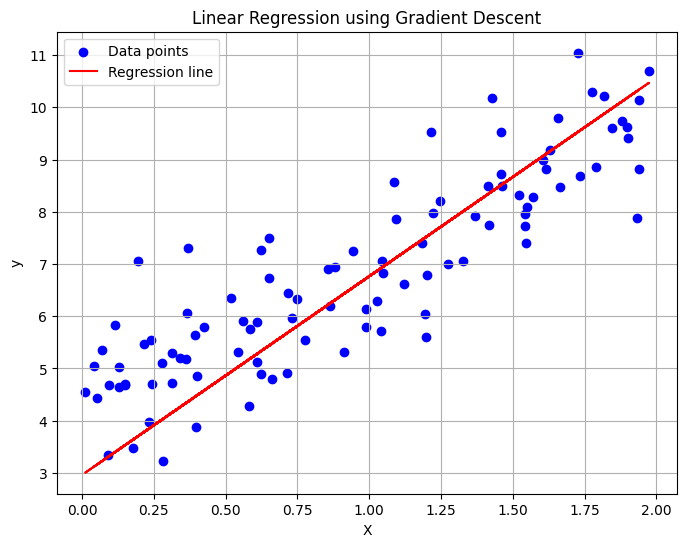

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature from [0, 1) uniform distribution
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise (Gaussian noise)

# Add bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize parameters
beta = np.random.randn(2, 1)  # Random initial coefficients
learning_rate = 0.01
n_iterations = 100
m = X_b.shape[0]  # Number of samples

beta_updates = [beta.copy()]

# Gradient Descent
for iteration in range(n_iterations):
    gradients = -2/m * X_b.T @ (y - X_b @ beta)  # Compute gradient
    beta = beta - learning_rate * gradients  # Update parameters
    beta_updates.append(beta.copy())

# Final parameters
print("Estimated coefficients (beta):", beta)

# Predictions
y_pred = X_b @ beta

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


Iteration 0: beta = [0.01300189 1.45353408]
Iteration 1: beta = [0.12180499 1.56507648]
Iteration 2: beta = [0.22633422 1.67181808]
Iteration 3: beta = [0.32676535 1.77395782]
Iteration 4: beta = [0.42326689 1.8716864 ]
Iteration 5: beta = [0.5160004  1.96518667]
Iteration 6: beta = [0.60512075 2.05463391]
Iteration 7: beta = [0.69077645 2.14019616]
Iteration 8: beta = [0.77310984 2.22203453]
Iteration 9: beta = [0.85225741 2.30030345]
Iteration 10: beta = [0.92835001 2.37515099]
Iteration 11: beta = [1.00151308 2.44671909]
Iteration 12: beta = [1.0718669  2.51514384]
Iteration 13: beta = [1.13952675 2.58055569]
Iteration 14: beta = [1.20460319 2.64307972]
Iteration 15: beta = [1.26720221 2.70283582]
Iteration 16: beta = [1.32742539 2.75993895]
Iteration 17: beta = [1.38537016 2.81449929]
Iteration 18: beta = [1.4411299 2.8666225]
Iteration 19: beta = [1.49479416 2.91640985]
Iteration 20: beta = [1.54644877 2.96395843]
Iteration 21: beta = [1.59617603 3.00936133]
Iteration 22: beta = [

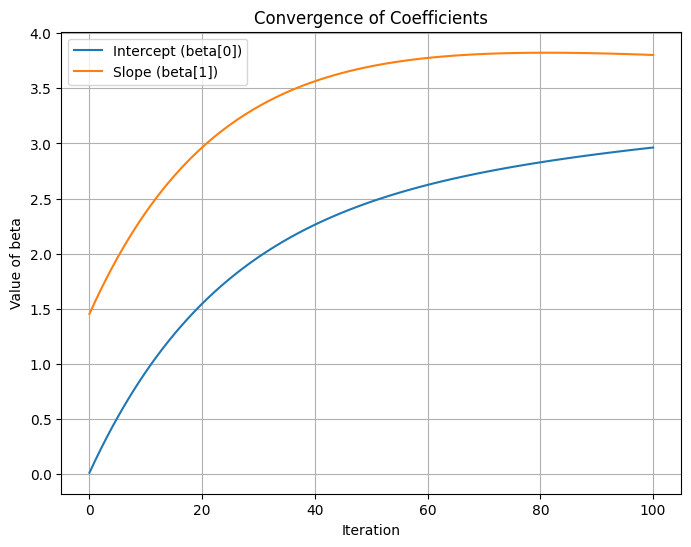

In [21]:
# Visualize beta updates
for i, beta in enumerate(beta_updates):
    print(f"Iteration {i}: beta = {beta.flatten()}")

# Plot convergence of coefficients
beta_updates = np.array(beta_updates).squeeze()

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations + 1), beta_updates[:, 0], label='Intercept (beta[0])')
plt.plot(range(n_iterations + 1), beta_updates[:, 1], label='Slope (beta[1])')
plt.xlabel('Iteration')
plt.ylabel('Value of beta')
plt.title('Convergence of Coefficients')
plt.legend()
plt.grid(True)
plt.show()


#### Reasons to use GD instead of MLE, OLS

- Gradient Descent is favored over MLE or OLS in scenarios involving **large-scale data**, **high-dimensional features**, **non-linear models**, or **custom loss functions** due to its flexibility, efficiency, and scalability. However, for simple, small-scale problems, OLS or MLE may still be preferred for their directness and precision.

